<a href="https://colab.research.google.com/github/asaranti/MATLAB_PV_LIB/blob/master/FC_LRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################################################################
# [0]. Install the necessary packages ==========================================
################################################################################

!pip3 install scipy
!pip3 install matplotlib

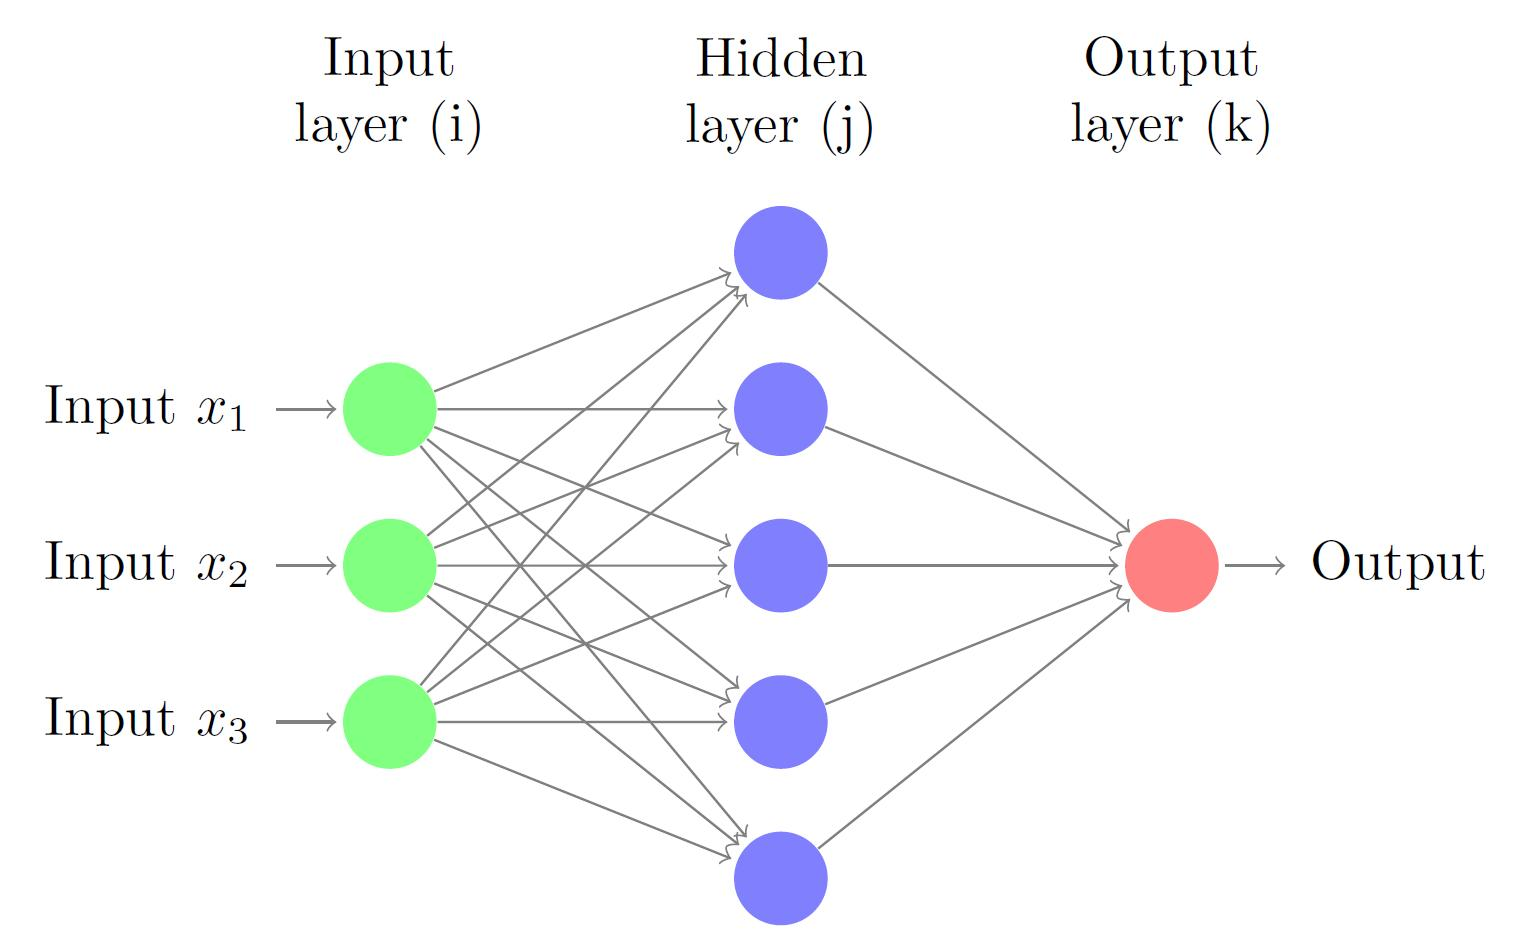

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/figures/FC_Neural_Network_A.jpeg")

In [ ]:
from IPython.display import Image
Image("figures/FC_Neural_Network_B.jpeg")

In [ ]:
################################################################################
# Computation of relevances ====================================================
################################################################################
from IPython.display import Math, HTML

Math(r'x_j = max(0, \sum_i x_i w_{ij} + b_j) \\ x_k = \sum_j x_j \\ R_k = x_k = \sum_j x_j \\ ')

<IPython.core.display.Math object>

In [ ]:

Math(r'R_j = R_k(\tilde{\mathbf{x}}) + \frac{\partial R_k}{\partial x_j} \biggr\rvert_{\{ \tilde{x}_j \}} \cdot (x_j - \tilde{x}_j) = x_j = max(0, \sum_i x_i w_{ij} + b_j) \\' )




<IPython.core.display.Math object>

In [ ]:
Math(r'R_i = \sum_j \frac{w_{ij}^2}{\sum_{\'{i}}} w_{\acute{\'{i}}j}^2} R_j')

<IPython.core.display.Math object>

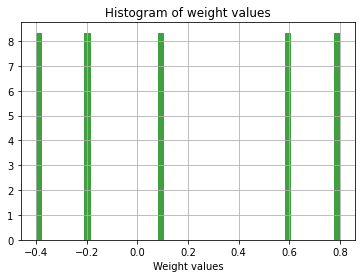

Output value of the network: 3.8


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

################################################################################
# [1.1] Define input, weights ==================================================
################################################################################

# 1.1.1. Selected --------------------------------------------------------------
x_i_dict = {'x_1': 3, 'x_2': 4, 'x_3': -10} 

w_j_1_dict = {'w_i1_j1': -0.2, 'w_i2_j1': 0.5, 'w_i3_j1': -0.1}
w_j_2_dict = {'w_i1_j2': -0.25, 'w_i2_j2': 0.1, 'w_i3_j2': 0.4}
w_j_3_dict = {'w_i1_j3': 0.2, 'w_i2_j3': -0.3, 'w_i3_j3': -0.2}
w_j_4_dict = {'w_i1_j4': 0.5, 'w_i2_j4': -0.8, 'w_i3_j4': 0.6}
w_j_5_dict = {'w_i1_j5': 0.1, 'w_i2_j5': 0.4, 'w_i3_j5': 0.7}

w_k_dict = {'w_j1_k1': 0.8, 'w_j2_k1': 0.1, 'w_j3_k1': -0.2, 
            'w_j4_k1': -0.4, 'w_j5_k1': 0.6}


# 1.1.2. Random ----------------------------------------------------------------
mu, sigma = 0, 0.05
x_i_normal = np.random.normal(mu, sigma, 3)

x_j_1_normal = np.random.normal(mu, sigma, 3)
x_j_2_normal = np.random.normal(mu, sigma, 3)
x_j_3_normal = np.random.normal(mu, sigma, 3)
x_j_4_normal = np.random.normal(mu, sigma, 3)
x_j_5_normal = np.random.normal(mu, sigma, 3)

x_k_normal = np.random.normal(mu, sigma, 5)


# [10.] Histogram of weights -----------------------------------------------
n, bins, patches = plt.hist(w_k_dict.values(), 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Weight values')
plt.title('Histogram of weight values')
plt.grid(True)
plt.show()

################################################################################
# [1.2] Compute the NN functionality ===========================================
################################################################################
sum_j1 = x_i_dict['x_1'] * w_j_1_dict['w_i1_j1'] + \
         x_i_dict['x_2'] * w_j_1_dict['w_i2_j1'] + \
         x_i_dict['x_3'] * w_j_1_dict['w_i3_j1']
        
sum_j2 = x_i_dict['x_1'] * w_j_2_dict['w_i1_j2'] + \
         x_i_dict['x_2'] * w_j_2_dict['w_i2_j2'] + \
         x_i_dict['x_3'] * w_j_2_dict['w_i3_j2']
        
sum_j3 = x_i_dict['x_1'] * w_j_3_dict['w_i1_j3'] + \
         x_i_dict['x_2'] * w_j_3_dict['w_i2_j3'] + \
         x_i_dict['x_3'] * w_j_3_dict['w_i3_j3']

sum_j4 = x_i_dict['x_1'] * w_j_4_dict['w_i1_j4'] + \
         x_i_dict['x_2'] * w_j_4_dict['w_i2_j4'] + \
         x_i_dict['x_3'] * w_j_4_dict['w_i3_j4']
        
sum_j5 = x_i_dict['x_1'] * w_j_5_dict['w_i1_j5'] + \
         x_i_dict['x_2'] * w_j_5_dict['w_i2_j5'] + \
         x_i_dict['x_3'] * w_j_5_dict['w_i3_j5']

# Apply ReLU -------------------------------------------------------------------
val_j1 = max(0, sum_j1)
val_j2 = max(0, sum_j2)
val_j3 = max(0, sum_j3)
val_j4 = max(0, sum_j4)
val_j5 = max(0, sum_j5)

# Compute the output of the NN -------------------------------------------------
val_k1 = val_j1 + val_j2 + val_j3 + val_j4 + val_j5
print(f"Output value of the network: {val_k1}")


In [ ]:
################################################################################
# [2.1] Compute relevance k layer ==============================================
################################################################################
R_k = val_k1

print(f"Relevance of k layer: {R_k}")

################################################################################
# [2.2] Compute relevance j layer ==============================================
################################################################################
R_j1 = val_j1
R_j2 = val_j2
R_j3 = val_j3
R_j4 = val_j4
R_j5 = val_j5

print(f"Relevances of j layer: {R_j1}, {R_j2}, {R_j3}, {R_j4}, {R_j5}")

################################################################################
# [2.3] Compute relevance i layer ==============================================
################################################################################
sum_j1_power = w_j_1_dict['w_i1_j1'] ** 2 + \
               w_j_1_dict['w_i2_j1'] ** 2 + \
               w_j_1_dict['w_i3_j1'] ** 2

sum_j2_power = w_j_2_dict['w_i1_j2'] ** 2 + \
               w_j_2_dict['w_i2_j2'] ** 2 + \
               w_j_2_dict['w_i3_j2'] ** 2

sum_j3_power = w_j_3_dict['w_i1_j3'] ** 2 + \
               w_j_3_dict['w_i2_j3'] ** 2 + \
               w_j_3_dict['w_i3_j3'] ** 2

sum_j4_power = w_j_4_dict['w_i1_j4'] ** 2 + \
               w_j_4_dict['w_i2_j4'] ** 2 + \
               w_j_4_dict['w_i3_j4'] ** 2

sum_j5_power = w_j_5_dict['w_i1_j5'] ** 2 + \
               w_j_5_dict['w_i2_j5'] ** 2 + \
               w_j_5_dict['w_i3_j5'] ** 2

R_i1 = ((w_j_1_dict['w_i1_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i1_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i1_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i1_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i1_j5'] ** 2) / sum_j5_power) * R_j5

R_i2 = ((w_j_1_dict['w_i2_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i2_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i2_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i2_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i2_j5'] ** 2) / sum_j5_power) * R_j5

R_i3 = ((w_j_1_dict['w_i3_j1'] ** 2) / sum_j1_power) * R_j1 + \
       ((w_j_2_dict['w_i3_j2'] ** 2) / sum_j2_power) * R_j2 + \
       ((w_j_3_dict['w_i3_j3'] ** 2) / sum_j3_power) * R_j3 + \
       ((w_j_4_dict['w_i3_j4'] ** 2) / sum_j4_power) * R_j4 + \
       ((w_j_5_dict['w_i3_j5'] ** 2) / sum_j5_power) * R_j5


print(f"Relevances of i layer: {R_i1}, {R_i2}, {R_i3}")


Relevance of k layer: 3.8
Relevances of j layer: 2.4, 0, 1.4000000000000001, 0, 0
Relevances of i layer: 0.6494117647058824, 2.741176470588235, 0.4094117647058824


In [ ]:
Math(r'\forall \mathbf{x}, p: R_p(\mathbf{x}) \geq 0 \\ \sum_i R_i = \sum_j R_j ')

<IPython.core.display.Math object>

In [ ]:
################################################################################
# [3.1] Check positivity =======================================================
################################################################################

assert R_k >= 0, "Relevance in every layer must be positive"

assert R_j1 >=0, "Relevance in every layer must be positive"
assert R_j2 >=0, "Relevance in every layer must be positive"
assert R_j3 >=0, "Relevance in every layer must be positive"
assert R_j4 >=0, "Relevance in every layer must be positive"
assert R_j5 >=0, "Relevance in every layer must be positive"

assert R_i1 >=0, "Relevance in every layer must be positive"
assert R_i2 >=0, "Relevance in every layer must be positive"
assert R_i3 >=0, "Relevance in every layer must be positive"


################################################################################
# [3.2] Check conservativity ===================================================
################################################################################
sum_Rj = R_j1 + R_j2 + R_j3 + R_j4 + R_j5
print(f" Conservativity j --to--> k: sum_Rj: {sum_Rj}, R_k: {R_k}")


sum_Ri = R_i1 + R_i2 + R_i3
print(f" Conservativity i --to--> j: sum_Ri: {sum_Ri}, sum_Rj: {sum_Rj}")

 Conservativity j --to--> k: sum_Rj: 3.8, R_k: 3.8
 Conservativity i --to--> j: sum_Ri: 3.8, sum_Rj: 3.8


In [ ]:
import unittest

class TestLRPProperties(unittest.TestCase):
    
    def test_positivity(self):
        
        assert R_k >= 0, "Relevance in every layer must be positive"

        assert R_j1 >=0, "Relevance in every layer must be positive"
        assert R_j2 >=0, "Relevance in every layer must be positive"
        assert R_j3 >=0, "Relevance in every layer must be positive"
        assert R_j4 >=0, "Relevance in every layer must be positive"
        assert R_j5 >=0, "Relevance in every layer must be positive"

        assert R_i1 >=0, "Relevance in every layer must be positive"
        assert R_i2 >=0, "Relevance in every layer must be positive"
        assert R_i3 >=0, "Relevance in every layer must be positive"
        
    
    def test_conservativity(self):
        self.assertEqual(R_k, R_j1 + R_j2 + R_j3 + R_j4 + R_j5)
        self.assertEqual(R_j1 + R_j2 + R_j3 + R_j4 + R_j5, R_i1 + R_i2 + R_i3)
        

unittest.main(argv=[''], verbosity=2, exit=False)

test_conservativity (__main__.TestLRPProperties) ... ok
test_positivity (__main__.TestLRPProperties) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.008s

OK
